In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# cost function
def H(Graph, color_map):
    E, cost = Graph.edges(), 0
    for (v, w) in E:
        if color_map[v] == color_map[w]:
            cost += 1
    return cost

In [4]:
# generate random color map
def gen_map(colors, n):
    color_map = []
    for i in range(n):
        color_map.append(np.random.choice(colors))
    return color_map

In [5]:
# return n number of colors
def color_picker(n):
    options = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    selection, opt_cop = [], options.copy()
    for i in range(n):
        c = np.random.choice(opt_cop)
        selection.append(c)
        opt_cop.remove(c)
    return selection

In [6]:
# removes x (color) from list of colors and return another color other than x
def new_color(colors, x):
    colors.remove(x)
    return np.random.choice(colors)

In [7]:
def highest_degree(Graph):
    temp, max = Graph.degree(), 0
    for (v,d) in temp:
        if d > max:
            max = d
    return max

def avg_degree(Graph):
    temp, total = Graph.degree(), 0
    for (v,d) in temp:
        total += d
    return total/Graph.order() 

In [8]:
def anneal(Graph, map, colors):
    init_temp = 30
    final_temp = 0
    alpha = .1
    beta = 0.95

    current_temp = init_temp
    current_state = map.copy()
    solution = current_state.copy()

    while(current_temp > final_temp):
        vertex = np.random.randint(0, Graph.order()-1)    # pick random vertex

        orig_color = current_state[vertex]
        current_state[vertex] = new_color(colors.copy(), orig_color)    # pick dif color from orig and re-color

        cost = H(G, current_state) - H(G, solution)    # compute cost
        if cost <= 0:
            if np.random.uniform(0, 1) < np.exp(-cost/current_temp):
                solution = current_state.copy()
        elif cost > 0:
            if np.random.uniform(0, 1) < np.exp(-beta*cost):
                solution = current_state.copy()
        else:
            current_state[vertex] = orig_color
        current_temp -= alpha
    return solution

10
highest degree: 3
avg degree: 2.0


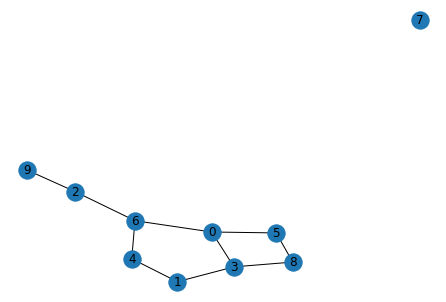

In [41]:
n = 10
deg = 3

G = nx.gnm_random_graph(n, n) # node_count, edge_count
#G = nx.random_degree_sequence_graph([deg for i in range(n)]) # degree sequence
#G = nx.configuration_model([deg for i in range(n)])

#G = nx.path_graph(n)
#G = nx.cycle_graph(n)
#G = nx.complete_graph(n)

nx.is_graphical(G)

print(G.order())
print('highest degree: ' + str(highest_degree(G)))
print('avg degree: ' + str(avg_degree(G)))

if G.order() <= 10:
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

min cost: 0


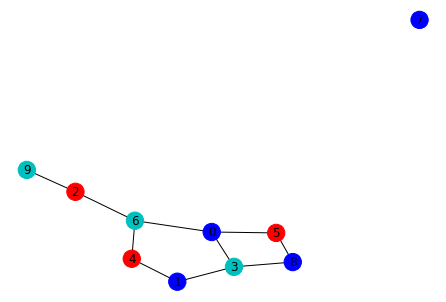

In [42]:
colors = color_picker(3)  # numb of possible colors (max 7)
numb_iter = 100

color_map = gen_map(colors, G.order())  # G.order number of nodes
min_cost = H(G, color_map)

cost_data = [min_cost]

for i in range(numb_iter):
    avg_run = np.array([])
    for j in range(5):
        temp = list(anneal(G, color_map, colors))
        temp_cost = H(G,temp)
        avg_run = np.append(avg_run, temp_cost)
        if temp_cost < min_cost:
            color_map = temp.copy()
            min_cost = temp_cost
    cost_data.append(np.average(avg_run))

print('min cost: ' + str(H(G,color_map)))

if G.order() <= 10:
    nx.draw(G, pos, node_color=color_map, with_labels=True)

Text(0, 0.5, 'Cost')

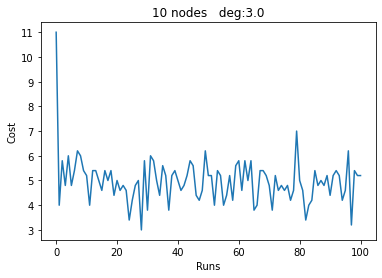

In [30]:
plt.plot([x for x in range(numb_iter+1)], cost_data)
plt.title(str(G.order()) + ' nodes   deg:' + str(avg_degree(G)))
plt.xlabel("Runs")
plt.ylabel("Cost")